In [1]:
from model.model import EVSpaceModel
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
import numpy as np


In [2]:
speed = 0.3
cfg = 'configs/Point_Edward_cfg.yml' #'configs/Mississauga_cfg.yml' # 
model = EVSpaceModel()  
model.run_model(100) #24*365   
print(model.av_charge)

{'output': {'output_dir': 'data//', 'model_reporters': {'av_charge': 'av_charge', 'completed_trip': 'completed_trip', 'dead_cars': 'dead_cars', 'charge_load': 'charge_load', 'date_time': 'date_time', 'av_moving': 'av_moving', 'av_home': 'av_home', 'av_work': 'av_work', 'av_random': 'av_random'}, 'agent_reporters': {'charge': 'charge', 'last_location': 'last_location', 'next_location': 'next_location', 'pos': 'pos', 'charging': 'charging', 'wait': 'wait', 'moving': 'moving', 'completed_trip': 'completed_trip', 'dist_moved': 'dist_moved'}}, 'model_params': {'start_date': '2022-01-01', 'seed': 'None', 'width': 200.0, 'height': 200.0, 'model_name': 0, 'tol': 0.01, 'POI_file': 'inputs/POIs.csv', 'Traffic_file': 'None', 'time_increment': 1, 'price': 0, 'location_probs_weekday': 'inputs/location_probs_weekday.csv', 'location_probs_weekend': 'inputs/location_probs_weekend.csv'}, 'agent_params': {'EVs': {'Type': 'EV', 'from_file': False, 'num_agents': 1000, 'discharge_rate': 0.2, 'MoveType': 'l

AttributeError: 'EVAgent' object has no attribute 'max_range'

In [ ]:
model.av_charge
model.seed

9954

In [ ]:
mdf = model.datacollector.get_model_vars_dataframe()
adf = model.datacollector.get_agent_vars_dataframe()
# adf.to_csv('xx.csv')
mdf.to_csv('data/mdf.csv')
adf.to_csv('data/adf.csv')

PermissionError: [Errno 13] Permission denied: 'data/mdf.csv'

In [ ]:
GP = model.datacollector_gridpoints.get_agent_vars_dataframe()
# XY = pd.DataFrame(GP['pos'].tolist()).rename({0:'X',1:'Y'},axis=1)

grid_spacing = model.cfg['agent_params']['Grid_Points']['grid_spacing']

GP_tot = GP.reset_index().groupby('AgentID').agg({'cars_passing':sum,'X':'first','Y':'first'})
# fig, ax = plt.subplots()
# sns.scatterplot(data=GP_tot, x='X',y='Y',c=GP_tot['cars_passing'])

X = GP_tot['X'].values.reshape((-1,grid_spacing))
Y = GP_tot['Y'].values.reshape((-1,grid_spacing))
Z = GP_tot['cars_passing'].values.reshape((-1,grid_spacing))

fig, ax = plt.subplots()
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cs = ax.contourf(X, Y, Z, 100)
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cbar = plt.colorbar(cs)


In [ ]:
mdf

C:\Users\fbishop\AppData\Local\Temp\15\ipykernel_31036\2463690222.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly = mdf.groupby(['isbusinessday','hour']).mean()
C:\Users\fbishop\AppData\Local\Temp\15\ipykernel_31036\2463690222.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourlyweekday = mdfweekday.groupby(['hour']).mean()
C:\Users\fbishop\AppData\Local\Temp\15\ipykernel_31036\2463690222.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns wh

,av_charge,completed_trip,dead_cars,charge_load,av_moving,av_home,av_work,av_random
hour,,,,,,,,
0,31.701422,46.00,0.0,0.0,0.0,0.67360,0.01080,0.06540
1,31.627609,57.20,0.0,0.0,0.0,0.63920,0.01700,0.08880
2,31.549209,61.00,0.0,0.0,0.0,0.60020,0.02360,0.11820
3,31.455736,74.40,0.0,0.0,0.0,0.55740,0.03200,0.14860
4,31.375523,75.20,0.0,0.0,0.0,0.53320,0.05140,0.14880
5,32.229961,76.75,0.0,0.0,0.0,0.57625,0.06200,0.14800
6,32.152702,83.75,0.0,0.0,0.0,0.56275,0.09825,0.11700
7,32.080863,79.00,0.0,0.0,0.0,0.54800,0.13775,0.08475
8,32.015369,74.75,0.0,0.0,0.0,0.52575,0.17700,0.06250


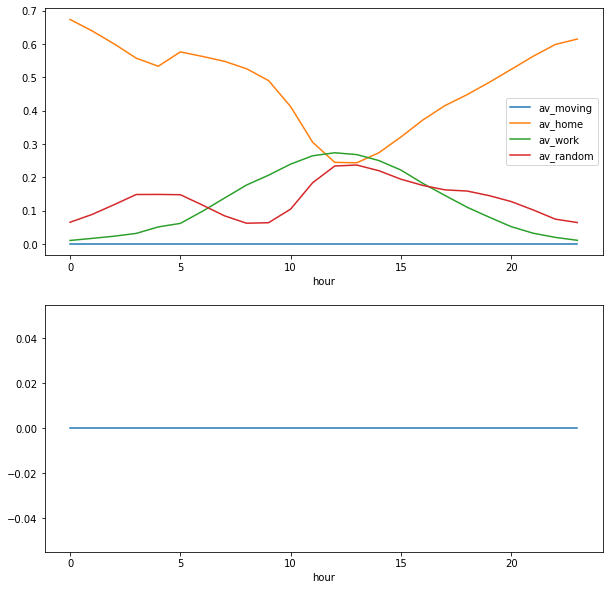

In [ ]:
import pandas as pd
def is_business_day(date):
        return bool(len(pd.bdate_range(date,date)))
mdf['isbusinessday'] = [is_business_day(date) for date in mdf.date_time]
mdf['hour'] = pd.to_datetime(mdf.date_time).dt.hour

hourly = mdf.groupby(['isbusinessday','hour']).mean()
mdfweekday = mdf[mdf['isbusinessday'] == True]
hourlyweekday = mdfweekday.groupby(['hour']).mean()
mdfweekend = mdf[mdf['isbusinessday'] == False]
hourlyweekend = mdfweekend.groupby(['hour']).mean()

fig, ax = plt.subplots(3,figsize=(10,10))

hourlyweekday[['av_moving','av_home','av_work','av_random']].plot(ax=ax[0],title='Weekday')
hourlyweekend[['av_moving','av_home','av_work','av_random']].plot(ax=ax[1],title='Weekend')
hourlyweekday['charge_load'].plot(ax=ax[2])
hourlyweekend['charge_load'].plot(ax=ax[2])